In [ ]:
import pandas as pd
pd.set_option("display.max_columns", 200)

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score, classification_report, 
                             ConfusionMatrixDisplay)

from sklearn import set_config
set_config(transform_output="pandas")

from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

import joblib

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, TunedThresholdClassifierCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifier, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, make_scorer, RocCurveDisplay, PrecisionRecallDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier, StackingClassifier
from sklearn import set_config
set_config(transform_output="pandas")

from xgboost import XGBClassifier, XGBRFClassifier

from lightgbm import LGBMClassifier

import sys
src_path = '../src'
sys.path.insert(0, src_path)
from eval_classification import eval_classification
del sys.path[0]

In [ ]:
model = tuned_threshold()
results = pd.DataFrame()

for under_sampler in [RandomUnderSampler(), 
                      NearMiss(version=3), 
                      RepeatedEditedNearestNeighbours(max_iter=1000), 
                      CondensedNearestNeighbour(random_state=42),
                      NeighbourhoodCleaningRule()]:
    results_frame = pd.DataFrame(index=[under_sampler])
    under_pipe = make_pipeline(preprocessor, StandardScaler(), under_sampler, model).fit(X_train, y_train)
    results_frame["train_f1"] = f1_score(y_train, under_pipe.predict_proba(X_test)[:, 1]), pos_label=1, average=binary)
    results_frame["test_f1"] = f1_score(y_test, under_pipe.predict_proba(X_test)[:, 1]), pos_label=1, average=binary)
    results_frame["train_auc"] = roc_auc_score(y_train, under_pipe.predict_proba(X_train)[:, 1])
    results_frame["test_auc"] = roc_auc_score(y_test, under_pipe.predict_proba(X_test)[:, 1])
    results = pd.concat([results,results_frame])




## Resampling

Train Evaluation
              precision    recall  f1-score   support

           0       0.96      0.68      0.79     56549
           1       0.16      0.68      0.25      4953

    accuracy                           0.68     61502
   macro avg       0.56      0.68      0.52     61502
weighted avg       0.90      0.68      0.75     61502



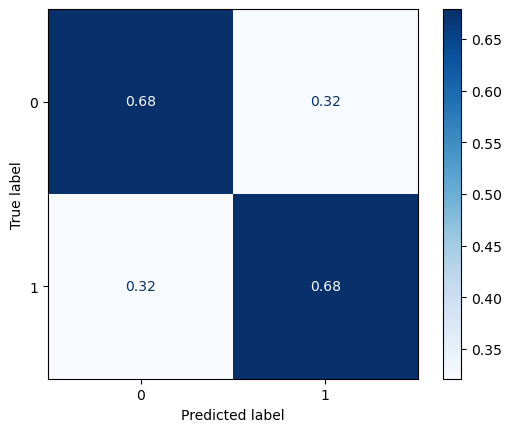

Test Evaluation
              precision    recall  f1-score   support

           0       0.96      0.68      0.79    226137
           1       0.15      0.66      0.25     19872

    accuracy                           0.68    246009
   macro avg       0.56      0.67      0.52    246009
weighted avg       0.89      0.68      0.75    246009



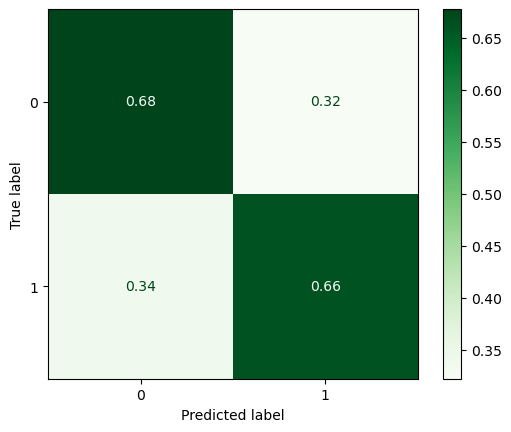

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
LogReg Under Sampled,0.678238,0.676325,0.155969,0.152729,0.678982,0.661232,0.253668,0.248142,0.74163,0.727902


In [ ]:
under_pipe = make_pipeline(preprocessor, StandardScaler(), RandomUnderSampler(), LogisticRegression(max_iter=1000)).fit(X_train, y_train)

under_results = eval_classification(under_pipe, X_train, y_train, X_test, y_test,
                              model_name="LogReg Under Sampled")

under_results

Train Evaluation
              precision    recall  f1-score   support

           0       1.00      0.69      0.82     56549
           1       0.22      1.00      0.36      4953

    accuracy                           0.71     61502
   macro avg       0.61      0.84      0.59     61502
weighted avg       0.94      0.71      0.78     61502



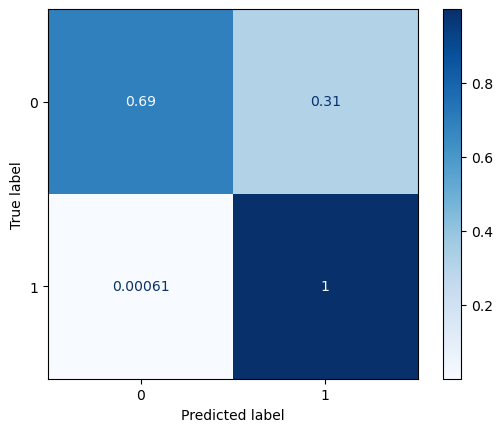

Test Evaluation
              precision    recall  f1-score   support

           0       0.94      0.58      0.71    226137
           1       0.10      0.55      0.17     19872

    accuracy                           0.57    246009
   macro avg       0.52      0.56      0.44    246009
weighted avg       0.87      0.57      0.67    246009



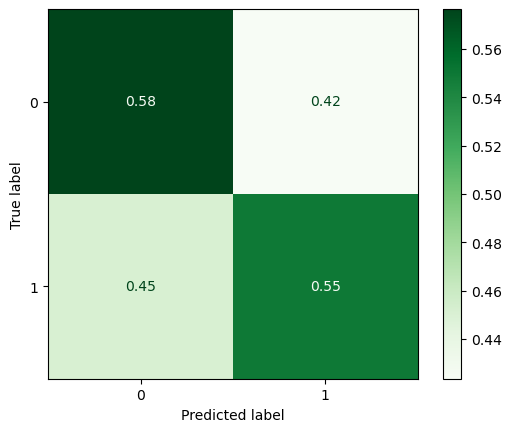

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
KNN,0.713164,0.574259,0.219143,0.102272,0.999394,0.549064,0.359464,0.172427,0.998956,0.583627


In [ ]:
knn = KNeighborsClassifier()
knn_pipe = make_pipeline(preprocessor, scaler, SMOTE(random_state=42), knn)

knn_pipe.fit(X_train, y_train)

knn_results = eval_classification(knn_pipe, X_train, y_train, X_test, y_test, 
                                  model_name="KNN")
    

knn_results

Train Evaluation
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56549
           1       0.16      0.66      0.25      4953

    accuracy                           0.69     61502
   macro avg       0.56      0.68      0.53     61502
weighted avg       0.89      0.69      0.76     61502



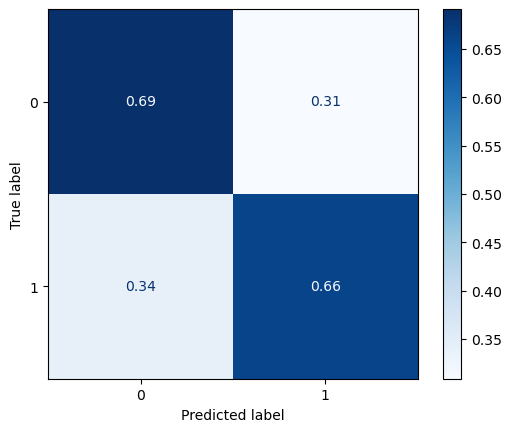

Test Evaluation
              precision    recall  f1-score   support

           0       0.96      0.69      0.80    226137
           1       0.15      0.64      0.25     19872

    accuracy                           0.69    246009
   macro avg       0.55      0.66      0.52    246009
weighted avg       0.89      0.69      0.76    246009



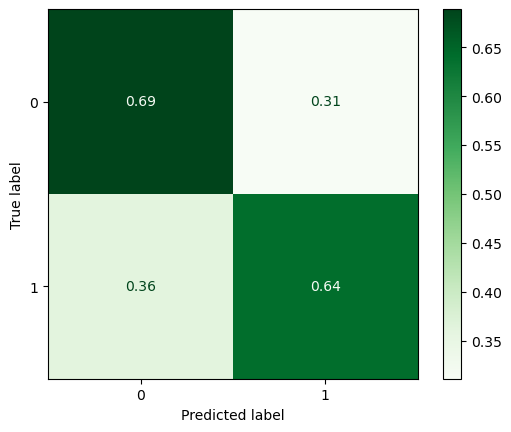

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
LogReg SMOTE,0.688612,0.685012,0.157616,0.152954,0.659802,0.638939,0.254448,0.246822,0.735289,0.721362


In [ ]:
smote_pipe = make_pipeline(preprocessor, scaler, SMOTE(), LogisticRegression(max_iter=1000)).fit(X_train, y_train)

smote_results = eval_classification(smote_pipe, X_train, y_train, X_test, y_test,
                              model_name="LogReg SMOTE")

smote_results

Train Evaluation
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56549
           1       1.00      1.00      1.00      4953

    accuracy                           1.00     61502
   macro avg       1.00      1.00      1.00     61502
weighted avg       1.00      1.00      1.00     61502



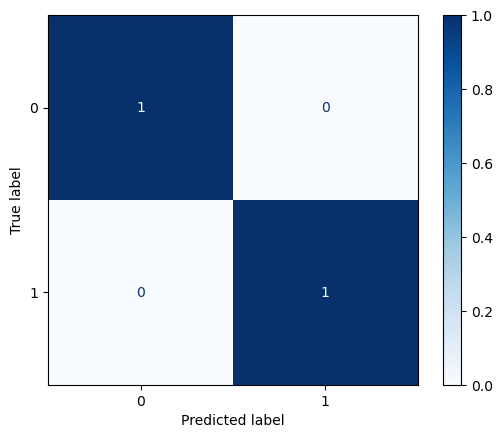

Test Evaluation
              precision    recall  f1-score   support

           0       0.93      0.92      0.92    226137
           1       0.14      0.16      0.15     19872

    accuracy                           0.86    246009
   macro avg       0.53      0.54      0.54    246009
weighted avg       0.86      0.86      0.86    246009



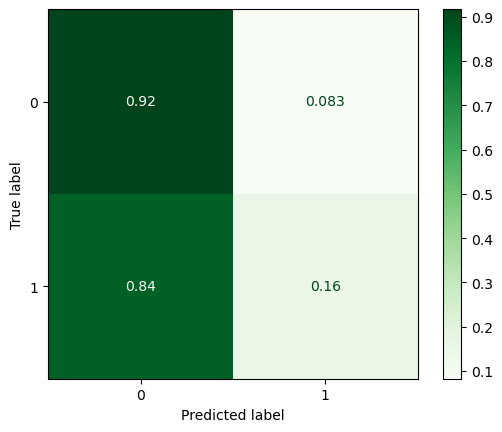

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
"Decision Tree class_weights=""balanced""",1.0,0.855997,1.0,0.142929,1.0,0.156653,1.0,0.149477,1.0,0.537053


Train Evaluation
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     56549
           1       0.18      0.77      0.29      4953

    accuracy                           0.70     61502
   macro avg       0.58      0.73      0.55     61502
weighted avg       0.91      0.70      0.77     61502



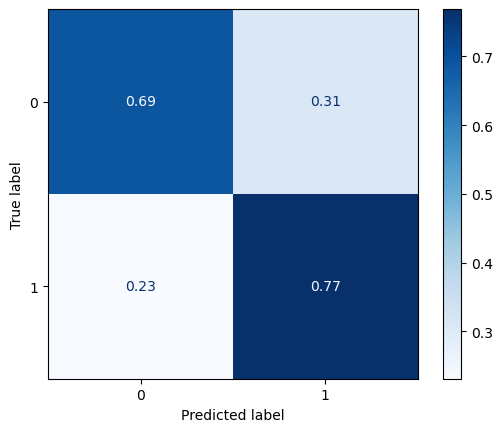

Test Evaluation
              precision    recall  f1-score   support

           0       0.96      0.68      0.79    226137
           1       0.15      0.64      0.24     19872

    accuracy                           0.68    246009
   macro avg       0.55      0.66      0.52    246009
weighted avg       0.89      0.68      0.75    246009



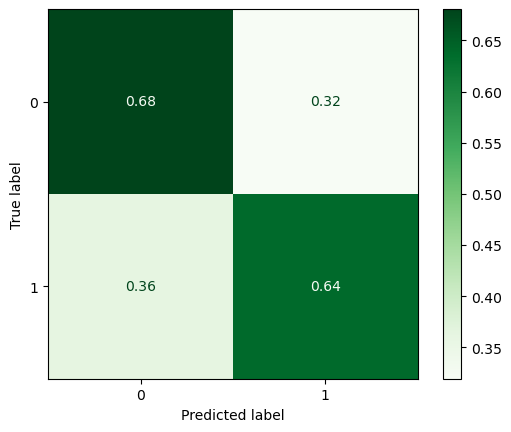

,train_acc,test_acc,train_prec,test_prec,train_recall,test_recall,train_f1,test_f1,train_auc,test_auc
"SVC class_weights=""balanced""",0.697262,0.677069,0.178931,0.149189,0.768827,0.63743,0.290299,0.241787,0.798665,0.71624


In [ ]:
svc = SVC(class_weight="balanced", probability=True, random_state=42)

svc_pipe = make_pipeline(preprocessor, scaler, RandomUnderSampler(), svc).fit(X_train, y_train)

svc_results = eval_classification(svc_pipe, X_train, y_train, X_test, y_test, 
                                  model_name="SVC class_weights=\"balanced\"")

svc_results

In [ ]:
clf = LogisticRegression(solver="liblinear").fit(X, y)
roc_auc_score(y, clf.predict_proba(X), multi_class='ovr')

In [ ]:
svc = SVC(class_weight="balanced", probability=True, random_state=42)

svc_pipe = make_pipeline(preprocessor, StandardScaler(), svc).fit(X_train, y_train)

svc_results = eval_classification(svc_pipe, X_train, y_train, X_test, y_test, 
                                  model_name="SVC class_weights=\"balanced\"", results_frame=knn_cv_results)

svc_results

In [ ]:
svc_params = {'C' : [0.1, 1, 10, 100, 1000]}
svc_gs = GridSearchCV(svc, svc_params, scoring="roc_auc")
svc_gs.fit(X_train_proc, y_train)
svc_cv = svc_gs.best_estimator_

svc_cv_pipe = make_pipeline(preprocessor, StandardScaler(), svc_cv).fit(X_train, y_train)

svc_cv_results = eval_classification(svc_cv_pipe, X_train, y_train, X_test, y_test, 
                                  model_name="SVC CV class_weights=\"balanced\"", results_frame=svc_results)

svc_cv_results

In [ ]:
test_data_file = "application_test.csv"
application_test = pd.read_csv(input_path + test_data_file)

application_test = pd.merge(application_test, bureau_loans_and_balances, how="left", on="SK_ID_CURR")
# application_test = test_data.drop_duplicates(subset=["SK_ID_CURR"])

ids = application_test.pop("SK_ID_CURR")
preds = svc_pipe.predict_proba(application_test)[:,1]

output = pd.DataFrame({"SK_ID_CURR": ids,
                       "TARGET": preds})

In [ ]:
output

,SK_ID_CURR,TARGET
0,100001,0.338490
1,100005,0.844969
2,100013,0.245391
3,100028,0.571485
4,100038,0.644647
...,...,...
48739,456221,0.273232
48740,456222,0.262137
48741,456223,0.404639
48742,456224,0.395226


In [ ]:
sample_submission_file = "sample_submission.csv"
sample_submission_df = pd.read_csv(input_path + sample_submission_file)
sample_submission_df["TARGET"] = preds
sample_submission_df.to_csv("01_more_data_plus_process.csv", index=False)
sample_submission_df.head()

,SK_ID_CURR,TARGET
0,100001,0.338490
1,100005,0.844969
2,100013,0.245391
3,100028,0.571485
4,100038,0.644647


In [ ]:
# # create a logistic regression
# log_reg = LogisticRegression(max_iter=100000, random_state=42)
# log_reg.fit(X_train_proc, y_train)
# log_reg.predict_proba(X_test_proc)[:,0]

In [ ]:
eval_classification(best_knn, X_train_proc, y_train, X_test_proc, y_test, model_name="best knn", results_frame=None,
                        pos_label=1, average="binary")